###  Cargamos las librerias necesarias

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos

In [2]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url, error_bad_lines=False)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna
data

,Item,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,...,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26
0,Casos nuevos con sintomas,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,4320.0,4060.0,5016.0,4564.0,4181.0,3710.0,3078.0,3020.0,3778.0,3422.0
1,Casos totales,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,220628.0,225103.0,231393.0,236748.0,242355.0,246963.0,250767.0,254416.0,259064.0,263360.0
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3615.0,3841.0,4093.0,4295.0,4479.0,4502.0,4505.0,4731.0,4903.0,5068.0
4,Casos activos,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,35082.0,34821.0,35809.0,35844.0,37307.0,37064.0,35692.0,34592.0,34834.0,34861.0
5,Casos nuevos sin sintomas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,437.0,383.0,599.0,418.0,594.0,399.0,336.0,264.0,423.0,413.0
6,Casos nuevos totales,1.0,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,...,4757.0,4475.0,6290.0,5355.0,5607.0,4608.0,3804.0,3649.0,4648.0,4296.0
7,Casos activos por FD,1.0,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,...,75346.0,106811.0,108894.0,109003.0,108205.0,108117.0,108008.0,105920.0,104972.0,102514.0
8,Casos activos por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35082.0,34821.0,35809.0,35844.0,37307.0,37064.0,35692.0,34592.0,34834.0,34861.0
9,Casos recuperados por FIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,181931.0,186441.0,191491.0,196609.0,200569.0,205397.0,210570.0,215093.0,219327.0,223431.0


In [3]:
fallecidos  = data[data["Item"]=="Fallecidos"].values.tolist()[0][1:]
contagiados = data[data["Item"]=="Casos totales"].values.tolist()[0][1:]
df_letalidad = pd.DataFrame({
    'fecha': data.columns[1:],
    'contagiados': contagiados,
    'fallecidos': fallecidos
})
df_letalidad["letalidad"] = (df_letalidad["fallecidos"] / df_letalidad["contagiados"]) * 100

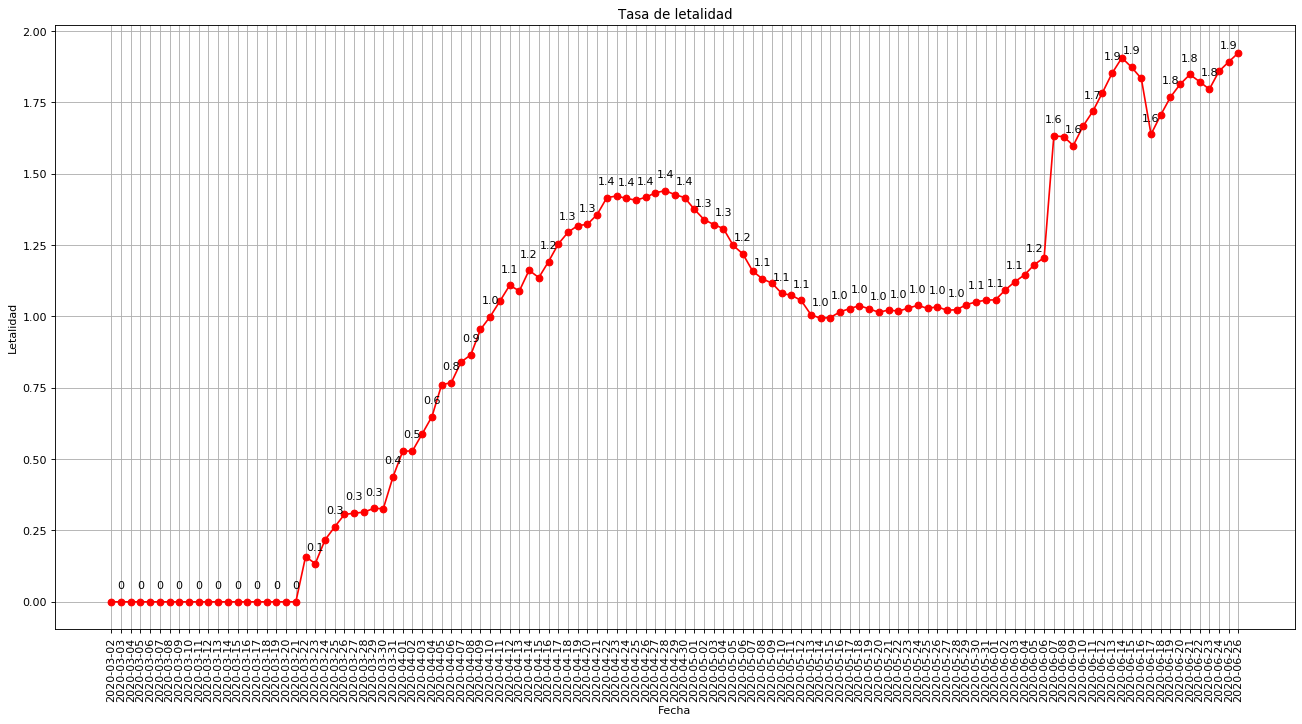

In [4]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        if float(Y[i]) == 0.0 :
            number = "0"
        else:
            number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
            
        if aux == 1:    
            plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 10),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')
            aux = 0
        else: 
            aux = 1
        
        

Y            = df_letalidad["letalidad"].values.tolist()
X            = data.columns[1:]
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1, 1, 1)
plt.plot(X, Y, 'ro-')
labelonbars(X, Y)
plt.xlabel('Fecha')
plt.ylabel('Letalidad')
plt.title('Tasa de letalidad')
plt.grid()
plt.xticks(X, rotation='vertical')
plt.show()

# Tasa de letalidad por regiones

In [5]:
url_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_region = pd.read_csv(url_region)
data_region

,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2020-03-04,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,3
2,2020-03-05,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,4
3,2020-03-06,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,5
4,2020-03-07,0,0,0,0,0,0,4,0,2,0,0,0,0,1,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2020-06-22,1420,5355,6708,718,2428,9615,198392,4186,4355,2181,5158,3009,621,1437,28,1352,246963
112,2020-06-23,1443,5442,6991,747,2485,9901,200861,4361,4504,2195,5328,3027,625,1466,28,1363,250767
113,2020-06-24,1473,5504,7227,785,2539,10187,203211,4610,4657,2219,5464,3037,629,1483,28,1363,254416
114,2020-06-25,1511,5577,7515,837,2637,10482,206246,4868,4832,2233,5702,3064,641,1505,29,1385,259064


In [9]:
date = str(datetime.date.today())
date='2020-06-26'

In [10]:
contagiados_total_region = data_region[data_region["Region"]== date].values.tolist()[0][1:]
regiones = data_region.columns.tolist()[1:]

In [11]:
df_letalidad_regiones = pd.DataFrame({
    'Region': regiones,
    'contagiados': contagiados_total_region
})

In [12]:
url_fallecidos_region  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto14/FallecidosCumulativo_T.csv"
data_fallecidos_region = pd.read_csv(url_fallecidos_region)
data_fallecidos_region = data_fallecidos_region.rename(columns={'Region':'Fecha'})
data_fallecidos_region
fallecidos_region = data_fallecidos_region[data_fallecidos_region["Fecha"]==date].values.tolist()[0][1:]

In [13]:
df_letalidad_regiones["Fallecidos"] = fallecidos_region

In [14]:
df_letalidad_regiones["Letalidad"] = (df_letalidad_regiones["Fallecidos"]/df_letalidad_regiones["contagiados"]) * 100
df_letalidad_regiones

,Region,contagiados,Fallecidos,Letalidad
0,Arica y Parinacota,1549,19,1.226598
1,Tarapacá,5712,85,1.488095
2,Antofagasta,7742,128,1.653320
3,Atacama,887,2,0.225479
4,Coquimbo,2705,23,0.850277
5,Valparaíso,10797,204,1.889414
6,Metropolitana,208862,4342,2.078885
7,O’Higgins,5136,65,1.265576
8,Maule,5013,39,0.777977
9,Ñuble,2274,31,1.363237


In [15]:
X = regiones
Y = df_letalidad_regiones["Letalidad"].tolist()

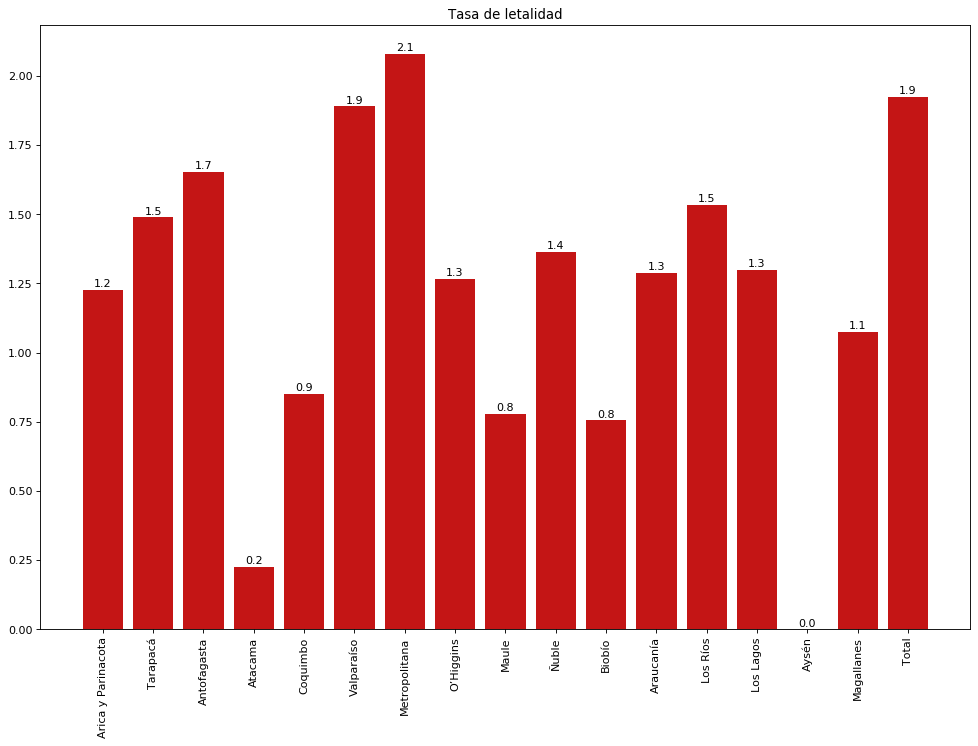

In [16]:
def labelonbars(X, Y):
    n       = len(X)
    aux = 0
    for i in range (n):
        number = '{0:.1f}'.format(float(Y[i])).replace(',', '.')
        plt.annotate(
                number, xy=(X[i], Y[i]),
                xytext =(0, 1),
                textcoords="offset points",
                ha ='center', va='bottom',
                size='10')    
            
plt.figure(figsize=(15, 10), dpi=80)
plt.bar(X, Y, color='#C41515')
plt.title("Tasa de letalidad")
labelonbars(X, Y)
plt.xticks(X, rotation='vertical')
plt.show()